## EDA IN DEPTH

In [1]:
#Importar Librerías
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from pylab import rcParams
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luisl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luisl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
# Leer la base datos principal
df = pd.read_excel("Data/pqr_radicacions.xlsx")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2835 entries, 0 to 2834
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                2835 non-null   int64  
 1   glb_estado_id                     2835 non-null   int64  
 2   glb_dependencia_id                2835 non-null   int64  
 3   pqr_medio_peticion_id             2835 non-null   int64  
 4   pqr_tipo_derechos_id              325 non-null    float64
 5   pqr_tipo_documento_id             0 non-null      float64
 6   glb_tipo_genero_id                268 non-null    float64
 7   ase_tipo_poblacion_id             360 non-null    float64
 8   ase_tipo_regimen_id               310 non-null    float64
 9   pqr_tipo_solicitud_id             342 non-null    float64
 10  pqr_tipo_solicitud_especifica_id  360 non-null    float64
 11  glb_zona_id                       294 non-null    float64
 12  glb_ba

### Distribución univaraida de los datos

Se revisan columnas relevantes y sus distribuciones, esto sólo para información que no requiere procesamiento 

In [44]:
#Funciones reutilizables: 

def rename_index(series_to_rename, df_to_dict):
    '''
    Función para renombrar el index de una serie a partir de un df con las columnas dos columnas
    
    '''
    dict_rename = pd.Series(df_to_dict.iloc[:,1].values,index=df_to_dict.iloc[:,0]).to_dict()
    series_renamed = series_to_rename.rename(index=dict_rename)
    
    return(series_renamed)

#### Estado de la solicitud 

''

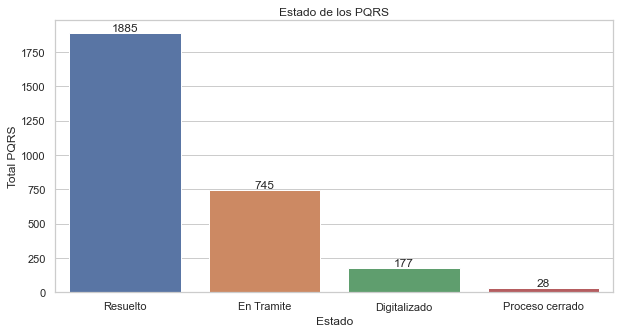

In [45]:
# Adecuando los datos:
data_estado = df['glb_estado_id'].value_counts()
glb_estados = pd.read_csv("Data/glb_estados.csv", usecols=['id', 'descripcion'])
data_estado = rename_index(data_estado, glb_estados)

#Crear la figura
fig, ax = plt.subplots(figsize=(10, 5))

#Crear al plot
sns.set_color_codes("pastel")
sns.barplot(x=data_estado.index, y=data_estado)

#Ajustes a la figura
ax.set(
    title = 'Estado de los PQRS',
    ylabel= 'Total PQRS',
    xlabel= 'Estado',
)
ax.bar_label(ax.containers[0])
;

In [46]:
print(f"El {data_estado['Resuelto']/data_estado.sum() :.0%} de los PRQS están marcados como resultados y el {data_estado['En Tramite']/data_estado.sum() :.0%} se encuentra en trámite") 

El 66% de los PRQS están marcados como resultados y el 26% se encuentra en trámite


En compración la base de datos inicial esta no incluye información con el estado "radicado"

#### Dependencia de los PQRS

''

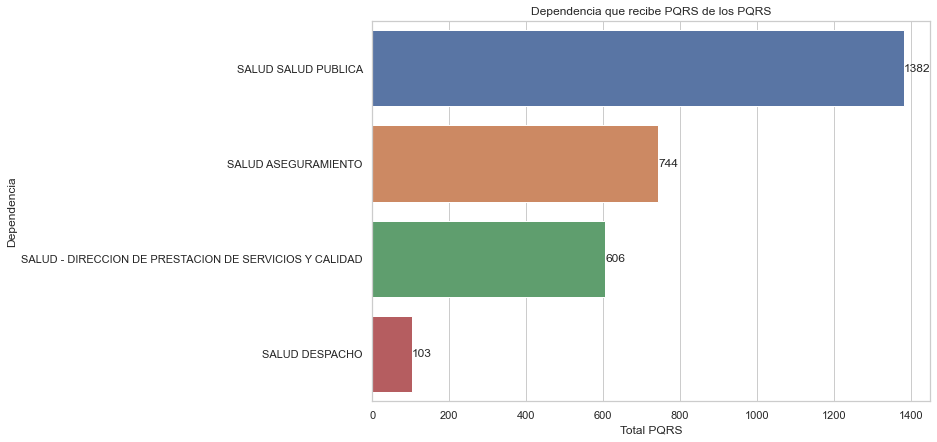

In [47]:
# Adecuando los datos:
data_depend = df['glb_dependencia_id'].value_counts()
glb_depend = pd.read_excel("Data/alcaldia_pruebas_public_glb_dependencias.xlsx", usecols=['id', 'descripcion'])
data_depend = rename_index(data_depend, glb_depend)

#Crear la figura
fig, ax = plt.subplots(figsize=(10, 7))

#Crear al plot
sns.set_color_codes("pastel")
sns.barplot(x=data_depend, y=data_depend.index)

#Ajustes a la figura
ax.set(
    title = 'Dependencia que recibe PQRS de los PQRS',
    ylabel= 'Dependencia',
    xlabel= 'Total PQRS',
)
ax.bar_label(ax.containers[0])
;

#### Tipos derechos de los PQRS recibidos

''

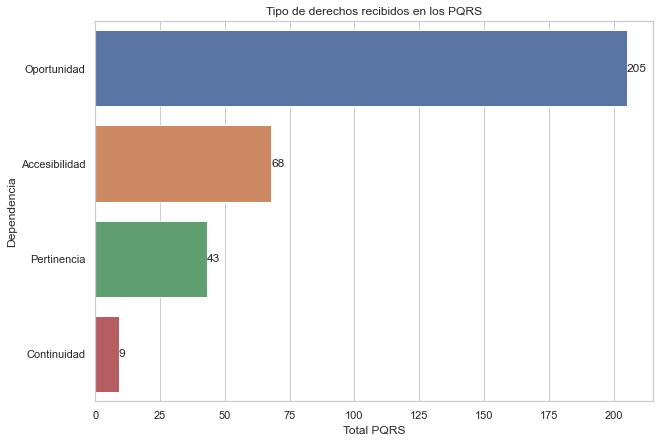

In [48]:
# Adecuando los datos:
data_pqrs_derecho = df['pqr_tipo_derechos_id'].value_counts()
glb_tipo_derecho = pd.read_csv("Data/pqr_tipo_derechos.csv", usecols=['id', 'descripcion'])
data_pqrs_derecho = rename_index(data_pqrs_derecho, glb_tipo_derecho)

#Crear la figura
fig, ax = plt.subplots(figsize=(10, 7))

#Crear al plot
sns.set_color_codes("pastel")
sns.barplot(x=data_pqrs_derecho, y=data_pqrs_derecho.index)

#Ajustes a la figura
ax.set(
    title = 'Tipo de derechos recibidos en los PQRS',
    ylabel= 'Dependencia',
    xlabel= 'Total PQRS',
)
ax.bar_label(ax.containers[0])
;

In [49]:
print(f"El {data_pqrs_derecho['Oportunidad']/data_pqrs_derecho.sum() :.0%} de los PRQS que están clasificados por tipo de derechos son de oportunidad, sin embargo sólo el {data_pqrs_derecho.sum()/len(df) :.0%} cuenta con esta caracterización") 

El 63% de los PRQS que están clasificados por tipo de derechos son de oportunidad, sin embargo sólo el 11% cuenta con esta caracterización


#### Más sobre PQRS caracterizados:  Tipo y tipo específico

''

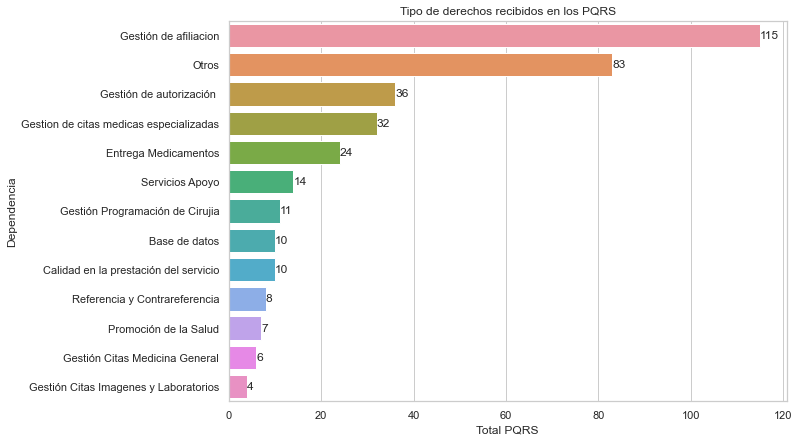

In [50]:
pqrs_tipo_especifico = df['pqr_tipo_solicitud_especifica_id'].value_counts()
glb_tipo_especifico = pd.read_csv("Data/pqr_tipo_solicitud_especificas.csv", usecols=['id', 'descripcion'])
data_pqrs_especifico = rename_index(pqrs_tipo_especifico, glb_tipo_especifico)

#Crear la figura
fig, ax = plt.subplots(figsize=(10, 7))

#Crear al plot
sns.set_color_codes("pastel")
sns.barplot(x=data_pqrs_especifico, y=data_pqrs_especifico.index)

#Ajustes a la figura
ax.set(
    title = 'Tipo de derechos recibidos en los PQRS',
    ylabel= 'Dependencia',
    xlabel= 'Total PQRS',
)
ax.bar_label(ax.containers[0])
;

''

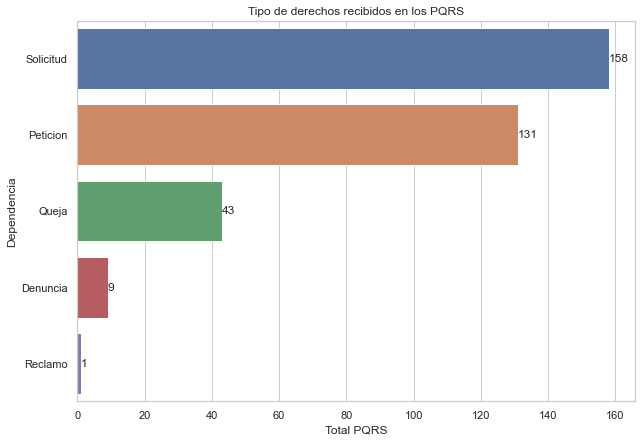

In [51]:
pqrs_tipo = df['pqr_tipo_solicitud_id'].value_counts()
glb_tipo = pd.read_csv("Data/pqr_tipo_solicituds.csv", usecols=['id', 'descripcion'])
data_pqrs_tipo = rename_index(pqrs_tipo, glb_tipo)


#Crear la figura
fig, ax = plt.subplots(figsize=(10, 7))

#Crear al plot
sns.set_color_codes("pastel")
sns.barplot(x=data_pqrs_tipo, y=data_pqrs_tipo.index)

#Ajustes a la figura
ax.set(
    title = 'Tipo de derechos recibidos en los PQRS',
    ylabel= 'Dependencia',
    xlabel= 'Total PQRS',
)
ax.bar_label(ax.containers[0])
;

#### Entidades 

''

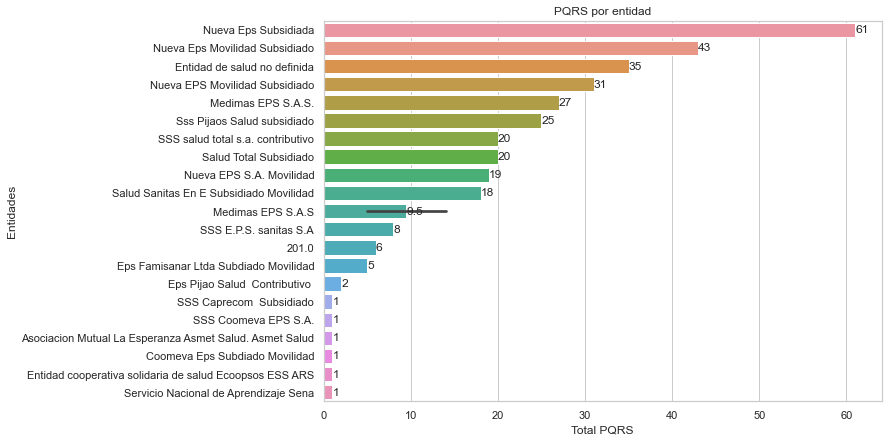

In [52]:
data_enti = df['glb_entidad_id'].value_counts()
glb_enti = pd.read_csv("Data/glb_entidads.csv", usecols=['id', 'razon_social'])
data_enti = rename_index(data_enti, glb_enti)


#Crear la figura
fig, ax = plt.subplots(figsize=(10, 7))

#Crear al plot
sns.set_color_codes("pastel")
sns.barplot(x=data_enti, y=data_enti.index)

#Ajustes a la figura
ax.set(
    title = 'PQRS por entidad',
    ylabel= 'Entidades',
    xlabel= 'Total PQRS',
)
ax.bar_label(ax.containers[0])
;

#### Asunto

Posiblemente esta sea la columna más importante de nuestra base de datos, por lo que inicialmente queremos entenderla.

##### Número de palabras en los asusntos

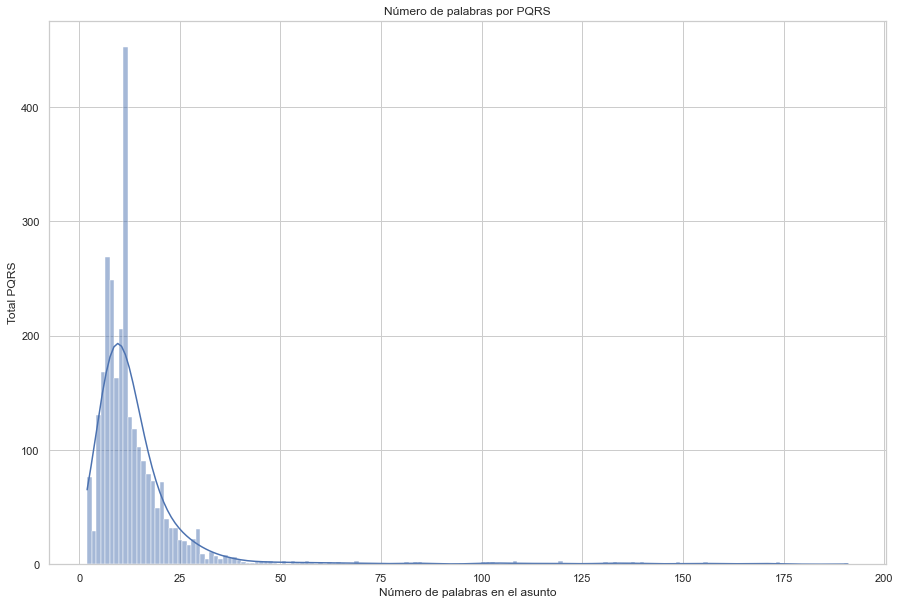

In [53]:
asunto_longitud = df['asunto'].apply(lambda x: len(nltk.word_tokenize(x)))

#Crear la figura
fig, ax = plt.subplots(figsize=(15, 10))

#Crear al plot
sns.set_color_codes("pastel")
sns.histplot(data=asunto_longitud, kde=True)

#Ajustes a la figura
ax.set(
    title = 'Número de palabras por PQRS',
    ylabel= 'Total PQRS',
    xlabel= 'Número de palabras en el asunto',
);

Entonces, el asunto es un texto que generalmente tiene menos de 25 palabras

##### Revisando las palabras más repetidas:

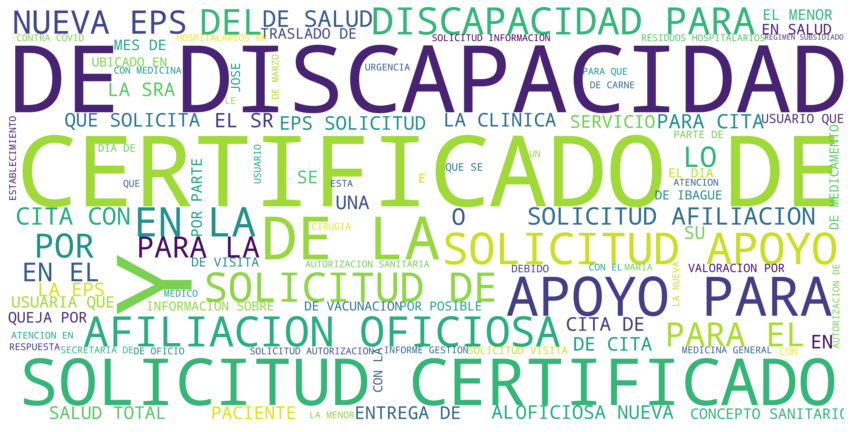

In [54]:
texto_cloud = ' '.join(df['asunto'])

rcParams['figure.figsize'] = 15, 30
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",\
                          scale = 10,width=800, height=400).generate(texto_cloud)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##### Mejorando el wordcloud

In [55]:
#tokenizar las palabras
palabras_asunto = nltk.word_tokenize(texto_cloud)

#Crear una lista de palabras descartablas
stop_words_spn = stopwords.words('spanish')

#Hacer todas las palabras minúsculas
palabras_asunto = [palabra.lower() for palabra in palabras_asunto]

#Filtramos las palabras
palabras_asunto_depurada = [w for w in palabras_asunto if not w in stop_words_spn and w.isalpha()]

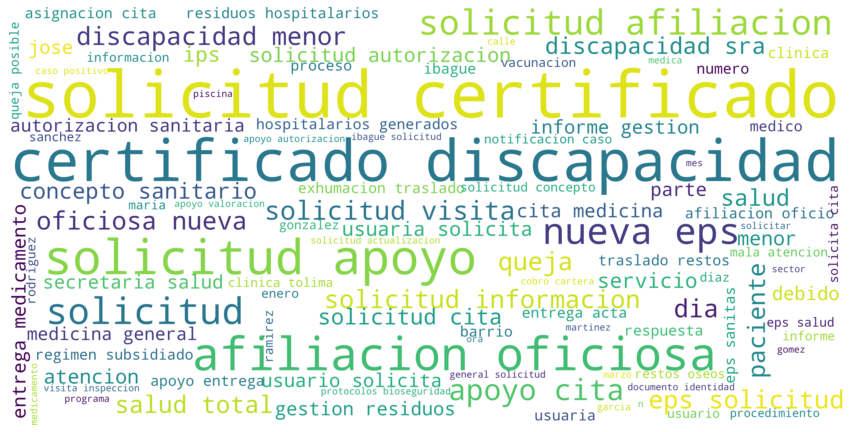

In [56]:
# nuevo wordcloud
rcParams['figure.figsize'] = 15, 30
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",\
                          scale = 10,width=800, height=400).generate(" ".join(palabras_asunto_depurada))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##### Utilizando sólo la primera palabra del asunto:

In [57]:
#Separar el asunto
df_asunto  = df['asunto'].str.split(n=1, expand=True).rename(columns={0:'TIPO_PRQ', 1:'DESCRIPCION'})

def format_text(text):
    '''
    Usar esta función para darle un formato uniforme al texto, de momento sólo eliminaré un par de caracteres
    '''
    if isinstance(text, str):
        text = re.sub('"', '', text)
    return(text)


df['TIPO_PRQ'] = df_asunto['TIPO_PRQ'].apply(format_text)

''

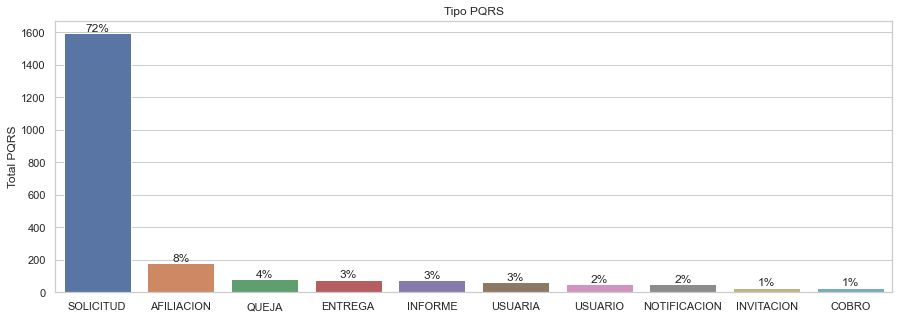

In [58]:
# Adecuando los datos:
data_asunto = df['TIPO_PRQ'].value_counts().head(10)

#Crear la figura
fig, ax = plt.subplots(figsize=(15, 5))

#Crear al plot
sns.set_color_codes("pastel")
sns.barplot(x=data_asunto.index, y=data_asunto)

#Ajustes a la figura
ax.set(
    title = 'Tipo PQRS',
    ylabel= 'Total PQRS',
)
derecho_ticklabel = [f"{data:.0%}" for data in data_asunto.values/sum(data_asunto.values)]
ax.bar_label(ax.containers[0], labels=derecho_ticklabel)
;

In [59]:
print(f"El {df_asunto['TIPO_PRQ'].value_counts().head(10).sum()/df_asunto['TIPO_PRQ'].size:.0%} de los PRQS podrían ser categorizados en el TOP 10 con la primera palabra del asunto")

El 78% de los PRQS podrían ser categorizados en el TOP 10 con la primera palabra del asunto


#### Tiempos de atenición

Inicialmente creamos varaibles de tiempo límite para atentender una PQRS, Tiempo real de Atención y días de demoras

In [60]:
#tiempo de atención límite, de atención y días de demoras
df['tiempo_límite'] = pd.to_datetime(df['fecha_vencimiento']) - pd.to_datetime(df['fecha_radicacion'])
df['tiempo_atencion'] = pd.to_datetime(df['fecha_respuesta'], ) - pd.to_datetime(df['fecha_radicacion'])
df['Dias_Demora'] = df['tiempo_atencion'] - df['tiempo_límite']

#Date_time to int
df['Dias_Demora_int'] = df['Dias_Demora'].dt.days
df['tiempo_límite_int'] = df['tiempo_límite'].dt.days
df['tiempo_atencion_int'] = df['tiempo_atencion'].dt.days

Descripción general de estos tiempos:

In [61]:
df[['Dias_Demora_int', 'tiempo_límite_int', 'tiempo_atencion_int']].describe()

,Dias_Demora_int,tiempo_límite_int,tiempo_atencion_int
count,1930.000000,2835.000000,1930.000000
mean,-193.773057,1260.083951,10.081865
std,1275.463110,3246.429573,13.739581
min,-10005.000000,1.000000,-8.000000
25%,-22.000000,21.000000,1.000000
50%,-19.000000,22.000000,5.000000
75%,-9.000000,50.000000,14.000000
max,39.000000,10005.000000,91.000000


##### Días de demora

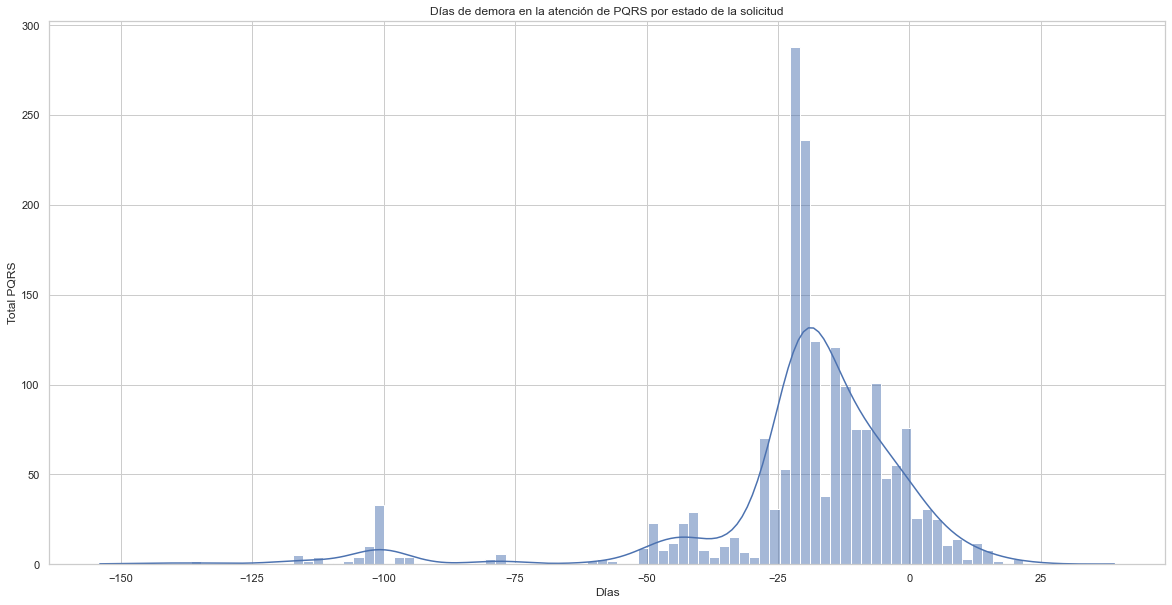

In [62]:
data_hist = df[df['Dias_Demora_int'] > -500]

#Crear la figura
fig, ax = plt.subplots(figsize=(20, 10))

#Crear al plot
sns.set_color_codes("pastel")
sns.histplot(data=data_hist,x='Dias_Demora_int', kde=True)

#Ajustes a la figura
ax.set(
    title = 'Días de demora en la atención de PQRS por estado de la solicitud',
    ylabel= 'Total PQRS',
    xlabel= 'Días',
);

##### Tiempos límites de atención

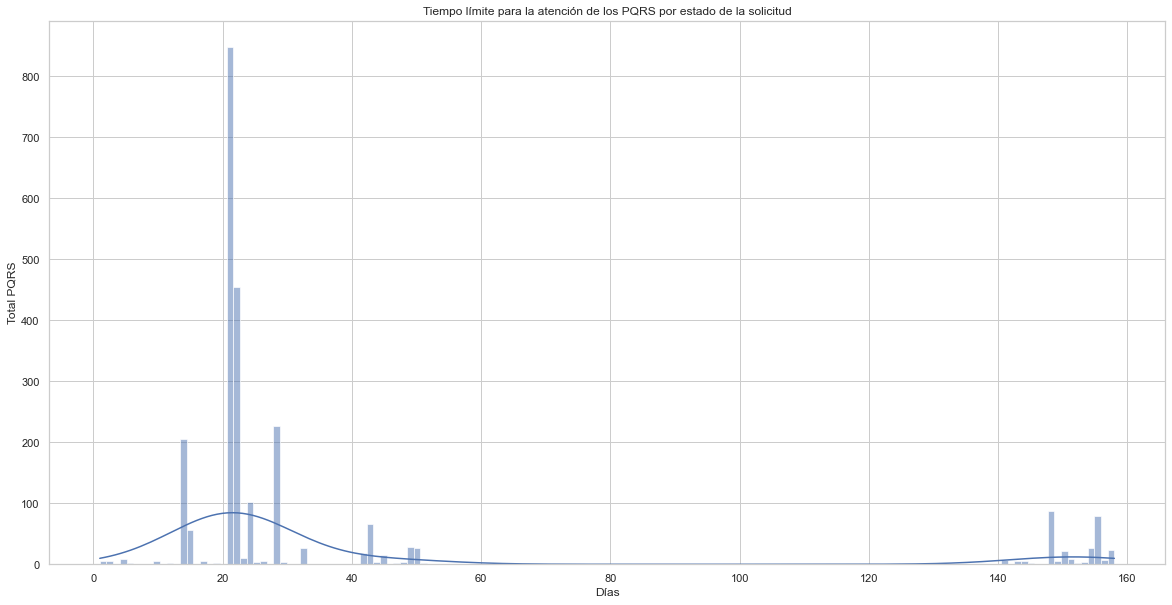

In [63]:
data_hist = df[df['tiempo_límite_int'] < 1000]

#Crear la figura
fig, ax = plt.subplots(figsize=(20, 10))

#Crear al plot
sns.set_color_codes("pastel")
sns.histplot(data=data_hist,x='tiempo_límite_int', kde=True)

#Ajustes a la figura
ax.set(
    title = 'Tiempo límite para la atención de los PQRS por estado de la solicitud',
    ylabel= 'Total PQRS',
    xlabel= 'Días'
);

##### Tiempos de atención

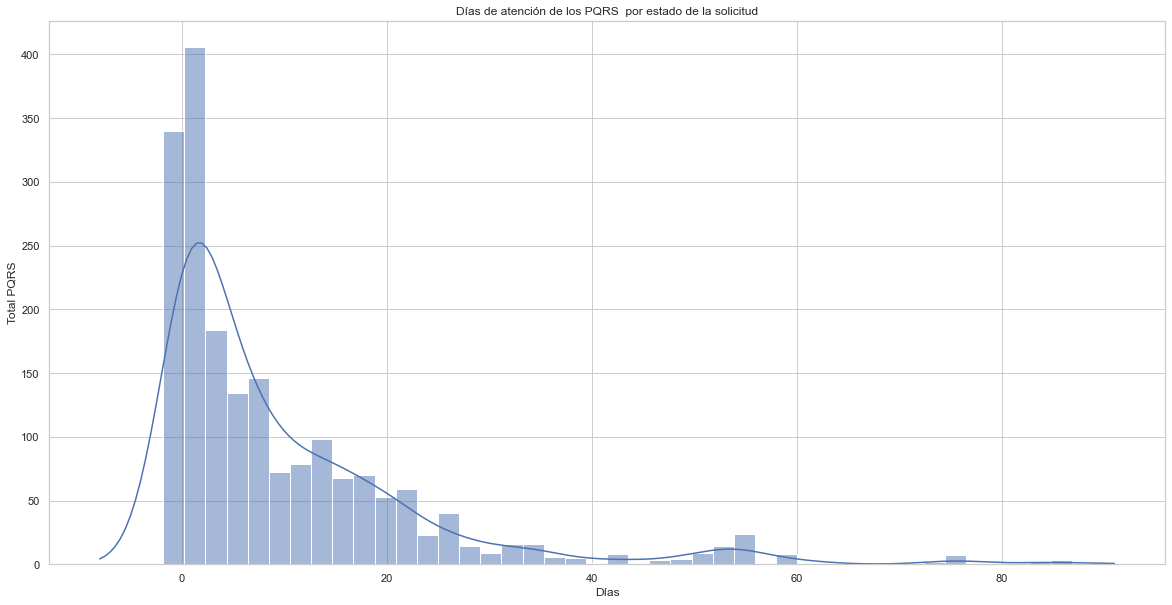

In [64]:
#Crear la figura
fig, ax = plt.subplots(figsize=(20, 10))

#Crear al plot
sns.set_color_codes("pastel")
sns.histplot(data=df, x='tiempo_atencion_int', kde=True)

#Ajustes a la figura
ax.set(
    title = 'Días de atención de los PQRS  por estado de la solicitud',
    ylabel= 'Total PQRS',
    xlabel= 'Días'
);

### Comparando tiempos de atención vs otras varaibles

In [66]:
#crear una columnas el nombre del estado NOTA: Podemos moficiar la función de arriba para genalizarla más y poder usarla n esta casi 
glb_estado =  pd.read_csv("Data/glb_estados.csv", usecols=['id', 'descripcion'])
dict_estado = pd.Series(glb_estado['descripcion'].values,index=glb_estado['id']).to_dict()
df['glb_estado_name'] = df['glb_estado_id'].replace(dict_estado)

#### Días de atención vs estado del PRQS

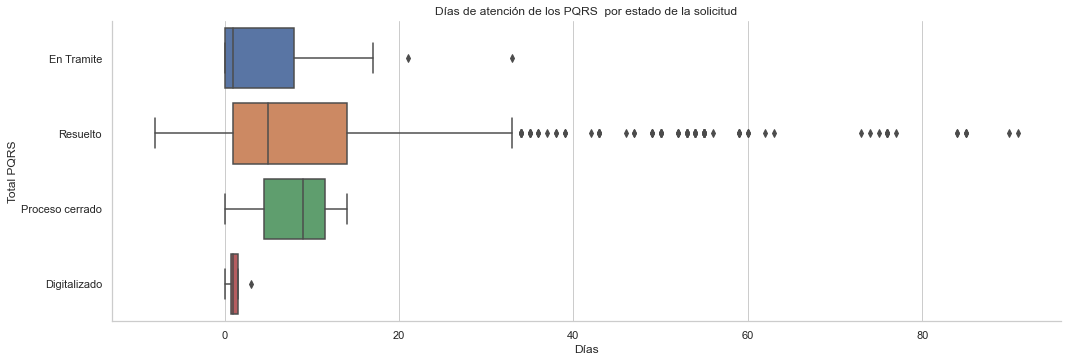

In [67]:
data_box_01 = df[df['Dias_Demora_int'] > -500]

#Crear al plot
sns.set_color_codes("pastel")
ax = sns.catplot(x="tiempo_atencion_int", y="glb_estado_name", kind="box", data=data_box_01, aspect=3)

#Ajustes a la figura
ax.set(
    title = 'Días de atención de los PQRS  por estado de la solicitud',
    ylabel= 'Total PQRS',
    xlabel= 'Días'
);

#### Días de demoras vs estado del PRQS

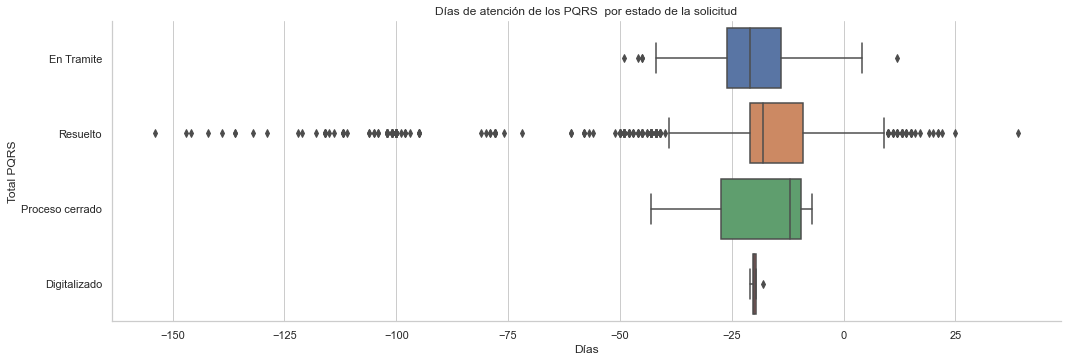

In [68]:
data_box_01 = df[df['Dias_Demora_int'] > -500]

#Crear al plot
sns.set_color_codes("pastel")
ax = sns.catplot(x="Dias_Demora_int", y="glb_estado_name", kind="box", data=data_box_01, aspect=3)

#Ajustes a la figura
ax.set(
    title = 'Días de atención de los PQRS  por estado de la solicitud',
    ylabel= 'Total PQRS',
    xlabel= 'Días'
);

#### Días de atención vs tipo del PRQS

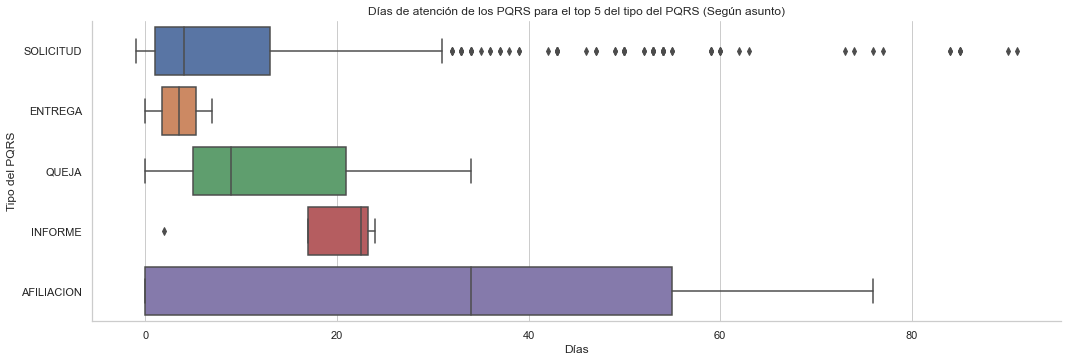

In [69]:
data_box = df[df['TIPO_PRQ'].isin(df['TIPO_PRQ'].value_counts().head(5).index)]

#Crear al plot
sns.set_color_codes("pastel")
ax = sns.catplot(x="tiempo_atencion_int", y="TIPO_PRQ", kind="box", data=data_box, aspect=3)

#Ajustes a la figura
ax.set(
    title = 'Días de atención de los PQRS para el top 5 del tipo del PQRS (Según asunto)',
    ylabel= 'Tipo del PQRS',
    xlabel= 'Días'
);

#### Días de atención vs tipo del PRQS Considerando si el PQRS está resulto o no

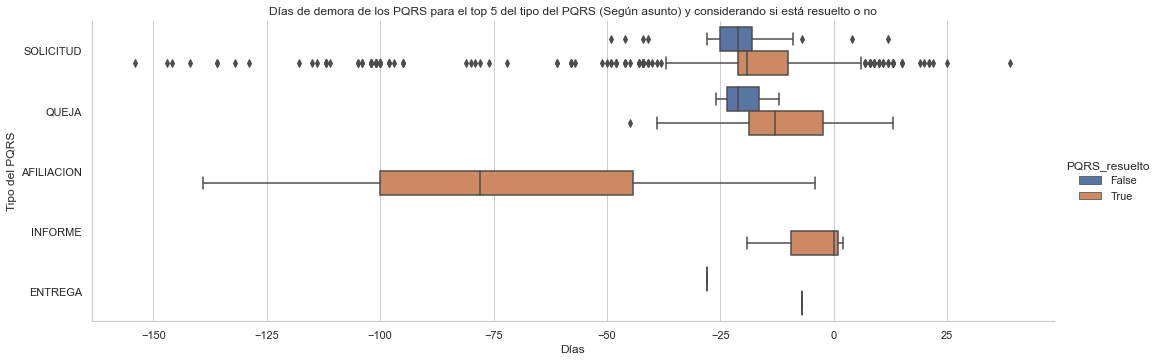

In [70]:
data_box = df[df['TIPO_PRQ'].isin(df['TIPO_PRQ'].value_counts().head(5).index)]
data_box = data_box[data_box['Dias_Demora_int'] > -500]
data_box['PQRS_resuelto'] = data_box['glb_estado_name'] == 'Resuelto'

#Crear al plot
sns.set_color_codes("pastel")
ax = sns.catplot(x="Dias_Demora_int", y="TIPO_PRQ", hue="PQRS_resuelto", kind="box", data=data_box, aspect=3)

#Ajustes a la figura
ax.set(
    title = 'Días de demora de los PQRS para el top 5 del tipo del PQRS (Según asunto) y considerando si está resuelto o no',
    ylabel= 'Tipo del PQRS',
    xlabel= 'Días',
);

#### Comparando el tipo de PQRS según el asunto y los caracterizados

In [85]:
#rename tipo especifico
glb_tipo_especifico = pd.read_csv("Data/pqr_tipo_solicitud_especificas.csv", usecols=['id', 'descripcion'])
dict_tipo_especifico = pd.Series(glb_tipo_especifico['descripcion'].values,index=glb_tipo_especifico['id']).to_dict()
df['pqrs_tipo_especifico_name'] = df['pqr_tipo_solicitud_especifica_id'].replace(dict_tipo_especifico)

#rename tipo
glb_tipo = pd.read_csv("Data/pqr_tipo_solicituds.csv", usecols=['id', 'descripcion'])
dict_tipo = pd.Series(glb_tipo['descripcion'].values,index=glb_tipo['id']).to_dict()
df['pqrs_tipo_solicitud_name'] = df['pqr_tipo_solicitud_id'].replace(dict_tipo)

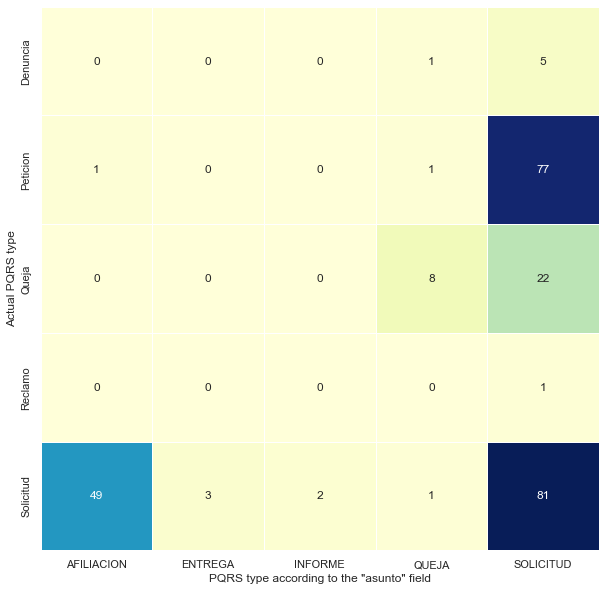

In [102]:
#filter the data
df_cross_tipo = df[df['TIPO_PRQ'].isin(df['TIPO_PRQ'].value_counts().head(5).index)]

#plot a crosstab
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(pd.crosstab(df_cross_tipo['pqrs_tipo_solicitud_name'],df_cross_tipo['TIPO_PRQ']), annot =True, linewidths=.5, cbar=False, cmap="YlGnBu")

ax.set(
    ylabel= 'Actual PQRS type',
    xlabel= 'PQRS type according to the "asunto" field'
);

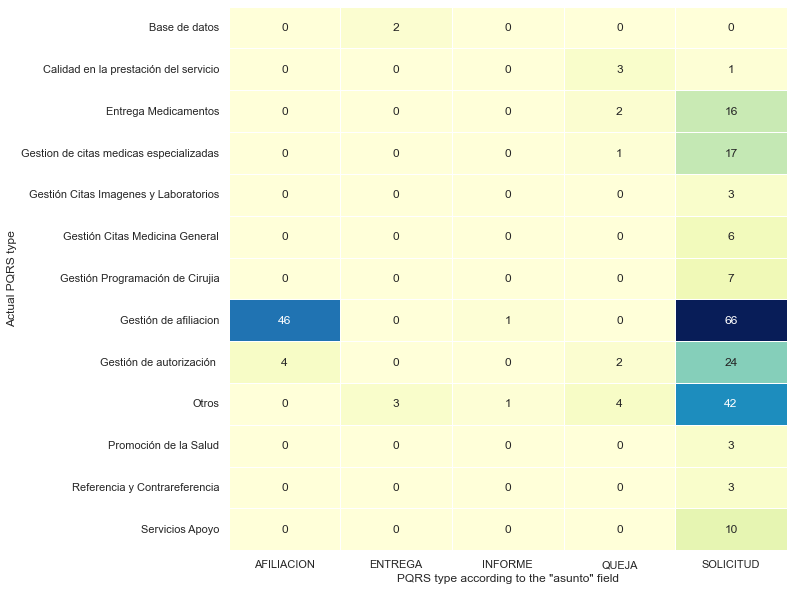

In [103]:
#filter the data
df_cross_tipo = df[df['TIPO_PRQ'].isin(df['TIPO_PRQ'].value_counts().head(5).index)]

#plot a crosstab
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(pd.crosstab(df_cross_tipo['pqrs_tipo_especifico_name'], df_cross_tipo['TIPO_PRQ']), annot =True, linewidths=.5, cbar=False, cmap="YlGnBu")

ax.set(
    ylabel= 'Actual PQRS type',
    xlabel= 'PQRS type according to the "asunto" field'
);